In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility import *
from tools import *
from maps import *

In [2]:
# Load the Data's directory.
datadir = 'C:/Users/Kevin/Desktop/SstAnalysis/08-04-25/03_01_01.zda'

# Load the Tool Packages.
DataLoader = DataLoader(datadir)
Tools = Tools()
Maps = Maps()

In [3]:
index = np.linspace(0, 499.5, 1000)
basePt = 90
skipPt = 60

Data = DataLoader.get_data()
# Data = Tools.Polynormal(startPt=basePt, numPt=skipPt, Data=Data)
Data = Tools.Polynomial(startPt=basePt, numPt=skipPt, Data=Data)
Rli = DataLoader.get_rli()
Data = Tools.Rli_Division(Rli=Rli, Data=Data)
Data = Tools.T_filter(Data=Data)
Data = Tools.S_filter(sigma=1, Data=Data)
Data_ave = np.mean(Data, axis=0)

In [4]:
map = np.zeros((80, 80))

for i in range(80):
    for j in range(80):
        SD = np.std(Data_ave[i, j, 10:60], ddof=1)
        MaxAmp = np.max(Data_ave[i, j, basePt:(basePt+skipPt)])
        SNR = MaxAmp / SD
        map[i][j] = SNR
        
map = map / np.max(map)

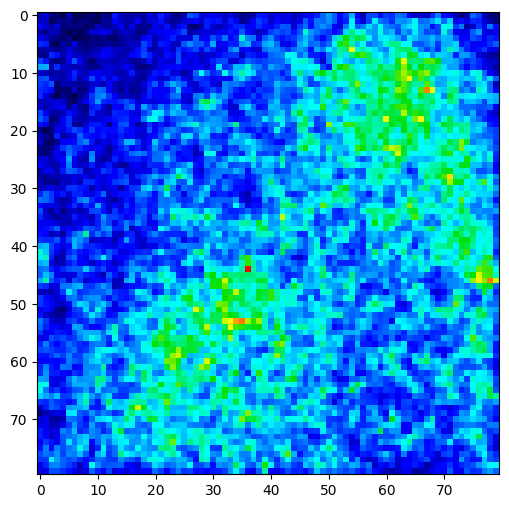

In [5]:
plt.figure(figsize=(6, 6))
plt.imshow(map, vmin=0, vmax=1, cmap=Maps.colorbar())
plt.show()